# PROYECTO PUGLIA

**PAQUETES REQUERIDOS**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**CARGA DE DATOS**

In [2]:
archivo = 'listings.csv'
_dataframe = pd.read_csv(archivo)

**ANALISIS EXPLORATORIO (EDA)**

Primero hacemos una exploración descriptiva de nuestros datos.

In [3]:
# -- Muestra las primeras filas del documento
_dataframe.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,37125,Rental unit in Conversano · 1 bedroom · 1 bed ...,160280,Francesca,Bari,Conversano,41.00059,17.15027,Entire home/apt,100.0,5,1,2011-05-27,0.01,1,365,0,NaN
1,60925,Dome in Ostuni · ★4.96 · 2 bedrooms · 3 beds ·...,294274,Anna,Brindisi,Ostuni,40.71846,17.43095,Entire home/apt,223.0,7,93,2023-09-28,0.68,3,103,4,NaN
2,39356,Bed and breakfast in Alliste · ★4.89 · 3 bedro...,161788,Iomammata&Tu,Lecce,Alliste,39.91808,18.07435,Private room,35.0,5,44,2023-07-02,0.27,1,365,1,NaN
3,61987,Rental unit in Vico Del Gargano · ★4.71 · 1 be...,301235,Giuseppe,Foggia,Vico del Gargano,41.90212,15.96531,Entire home/apt,50.0,1,49,2022-07-23,0.32,7,364,0,NaN
4,61989,Rental unit in Vico Del Gargano · ★4.73 · 1 be...,301235,Giuseppe,Foggia,Vico del Gargano,41.90139,15.96530,Entire home/apt,50.0,1,15,2023-05-21,0.23,7,364,3,NaN


In [4]:
_dataframe.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,4.183900e+04,4.183900e+04,41839.000000,41839.000000,41347.000000,41839.000000,41839.000000,27417.000000,41839.000000,41839.000000,41839.000000
mean,3.820507e+17,2.154648e+08,40.536900,17.596928,168.546497,3.201009,10.286121,0.483802,52.876144,243.171108,2.929157
std,4.186549e+17,1.848547e+08,0.508960,0.693253,729.459122,10.101998,26.076395,0.702001,216.501202,121.401003,6.991541
min,3.712500e+04,5.128000e+03,39.791780,15.005120,9.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,2.704562e+07,3.900262e+07,40.125975,17.238520,63.000000,1.000000,0.000000,0.110000,1.000000,157.000000,0.000000
50%,5.143851e+07,1.622697e+08,40.398675,17.710120,90.000000,2.000000,2.000000,0.240000,2.000000,269.000000,0.000000
75%,8.456250e+17,4.070185e+08,40.839245,18.158409,149.000000,4.000000,8.000000,0.570000,6.000000,363.000000,3.000000
max,1.056970e+18,5.530957e+08,42.121790,18.506180,90000.000000,999.000000,624.000000,11.110000,1260.000000,365.000000,137.000000


In [5]:
# -- Obtener información acerca del tipo de datos que continene las columnas
_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41839 entries, 0 to 41838
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              41839 non-null  int64  
 1   name                            41839 non-null  object 
 2   host_id                         41839 non-null  int64  
 3   host_name                       41839 non-null  object 
 4   neighbourhood_group             41839 non-null  object 
 5   neighbourhood                   41839 non-null  object 
 6   latitude                        41839 non-null  float64
 7   longitude                       41839 non-null  float64
 8   room_type                       41839 non-null  object 
 9   price                           41347 non-null  float64
 10  minimum_nights                  41839 non-null  int64  
 11  number_of_reviews               41839 non-null  int64  
 12  last_review                     

**ELIMINAR COLUMNAS POCO RELEVANTES**

In [6]:
# -- La columna *neighbourhood_group* no aporta información
# -- La columna *neighbourhood* no es relevante para nuestra investigación
# -- La columna *license* no es relevante para nuestra investigación
# -- La columna *latitude* no es relevante para nuestra investigación
# -- La columna *longitude* no es relevante para nuestra investigación

_dataframe = _dataframe.drop(columns=['neighbourhood_group', 'neighbourhood', 'license', 'latitude', 'longitude'])

In [7]:
# -- Modificamos la columna *name* para tomar solo la parte significativa de los nombres
_dataframe['name'] = [n.split('·')[0] for n in list(_dataframe['name'])]

In [8]:
# -- Eliminar filas con datos nulos
# -- Eliminamos las filas o columnas que no necesitamos, o aquellas que estén incompletas.

_dataframe = _dataframe.dropna()

In [9]:
def sort_by(col_names:list, df:pd.DataFrame)-> pd.DataFrame:
    '''
    Organiza los datos respecto a una columna
    
    :param col_name : str
           description -> Nombre de la columna con la cual se efectuará el orden de las filas del dataframe, ascendetemente
    :param df : Dataframe
           description -> El dataframe
    '''

    cop_df = df.copy()

    return cop_df.sort_values(by=col_names, ascending=[True for x in col_names])

# -- Organizamos por nombre del local y el precio

_dataframe = sort_by(df=_dataframe, col_names=['last_review',])

In [10]:
_dataframe.head(20)

,id,name,host_id,host_name,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,37125,Rental unit in Conversano,160280,Francesca,Entire home/apt,100.0,5,1,2011-05-27,0.01,1,365,0
79,237396,Bed and breakfast in Uggiano la Chiesa,1244643,Pierangelo,Private room,75.0,4,1,2012-09-10,0.01,3,365,0
331,1041483,Home in Conversano,3017146,Adriana,Entire home/apt,80.0,3,1,2013-07-28,0.01,2,363,0
430,1374583,Rental unit in Martina Franca,7448421,Francesco,Entire home/apt,390.0,3,1,2013-08-13,0.01,3,243,0
103,281119,Home in Ostuni,1465388,Giovanna,Entire home/apt,100.0,7,2,2013-08-19,0.02,1,358,0
393,1146789,Bed and breakfast in Gallipoli,6068832,Gianni,Private room,85.0,28,1,2013-08-31,0.01,1,268,0
129,526317,Bed and breakfast in Nardò,2586902,Maura,Private room,50.0,1,2,2014-04-02,0.01,5,365,0
916,2663031,Rental unit in Putignano,13566269,Loredana,Entire home/apt,60.0,3,1,2014-06-08,0.01,1,358,0
810,2471937,Home in Mattinata,12638285,Antonio,Entire home/apt,120.0,7,1,2014-06-17,0.01,14,0,0
271,985912,Rental unit in Lecce,5425979,Giuseppe,Entire home/apt,100.0,4,1,2014-06-20,0.01,3,364,0


In [11]:
def listar_columnas(df:pd.DataFrame) -> None:
    '''
    Imprime los nombres de las columnas existentes
    
    :param df : Dataframe
           description -> El dataframe
    '''
    column_names = df.columns
    for c in list(column_names):
        print(c)

listar_columnas(_dataframe)

id
name
host_id
host_name
room_type
price
minimum_nights
number_of_reviews
last_review
reviews_per_month
calculated_host_listings_count
availability_365
number_of_reviews_ltm


**AGREGAR CONVERSION DE COLUMNAS CATEGORICAS A NUMERICAS**

In [12]:
#  -- Agregamos la columna room_type_id como homogenea de room_type
_dataframe['room_type_id'], uniques = pd.factorize(_dataframe['room_type'])

# Convertir la columna 'last_review' a datetime
_dataframe['last_review'] = pd.to_datetime(_dataframe['last_review'])

# Crear las columnas 'day','month','year' extrayendo el mes de la columna 'last_review'
_dataframe['day'] = _dataframe['last_review'].dt.day
_dataframe['month'] = _dataframe['last_review'].dt.month
_dataframe['year'] = _dataframe['last_review'].dt.year

listar_columnas(_dataframe)

id
name
host_id
host_name
room_type
price
minimum_nights
number_of_reviews
last_review
reviews_per_month
calculated_host_listings_count
availability_365
number_of_reviews_ltm
room_type_id
day
month
year


In [13]:
_dataframe.describe()

,id,host_id,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,room_type_id,day,month,year
count,2.719100e+04,2.719100e+04,27191.000000,27191.000000,27191.000000,27191,27191.000000,27191.000000,27191.000000,27191.000000,27191.000000,27191.000000,27191.000000,27191.000000
mean,2.768894e+17,1.917377e+08,151.865029,2.979037,15.720643,2023-01-14 13:49:10.461549568,0.484648,43.546762,237.781803,4.476444,0.157920,16.891950,8.506932,2022.370417
min,3.712500e+04,5.128000e+03,9.000000,1.000000,1.000000,2011-05-27 00:00:00,0.010000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2011.000000
25%,2.119559e+07,3.506662e+07,60.000000,1.000000,2.000000,2022-09-03 00:00:00,0.110000,1.000000,152.000000,0.000000,0.000000,10.000000,8.000000,2022.000000
50%,4.424840e+07,1.353924e+08,85.000000,2.000000,5.000000,2023-08-19 00:00:00,0.240000,2.000000,265.000000,2.000000,0.000000,18.000000,8.000000,2023.000000
75%,6.650482e+17,3.489431e+08,130.000000,3.000000,16.000000,2023-09-26 00:00:00,0.570000,5.000000,359.000000,5.000000,0.000000,25.000000,9.000000,2023.000000
max,1.044753e+18,5.505607e+08,90000.000000,999.000000,624.000000,2023-12-31 00:00:00,11.110000,1260.000000,365.000000,137.000000,3.000000,31.000000,12.000000,2023.000000
std,3.818774e+17,1.734994e+08,787.028811,8.734547,30.941352,NaN,0.702994,197.686143,120.380443,8.232411,0.394607,8.794053,1.665062,1.340285


**GRAFICAS DE DISPERSION DE VARIABLES NUMERICAS**


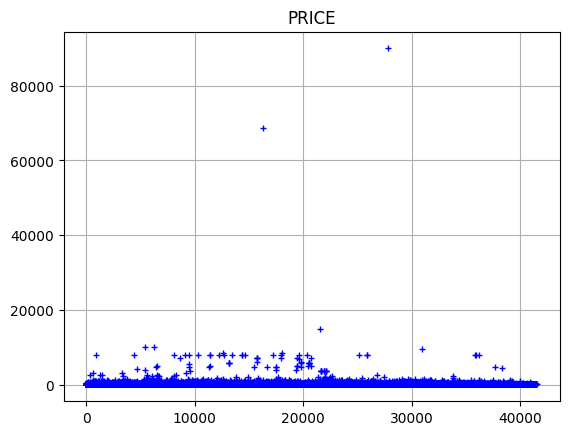

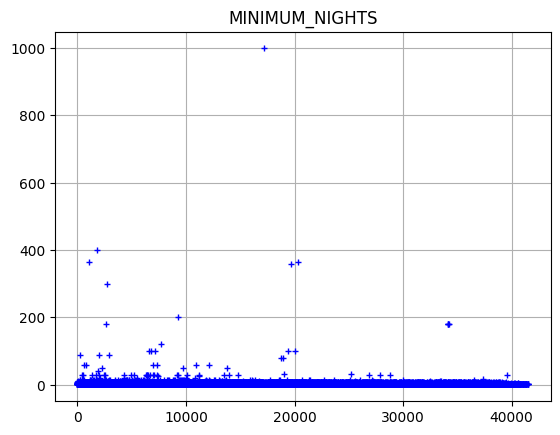

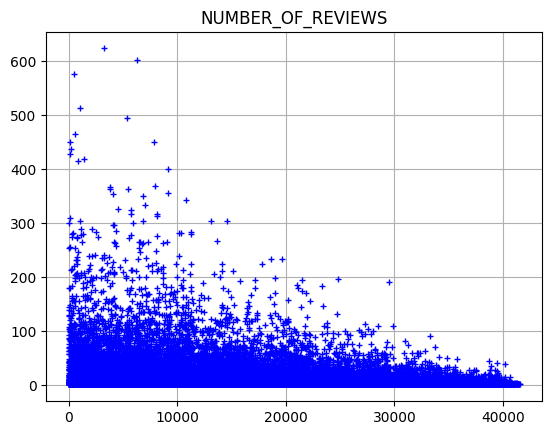

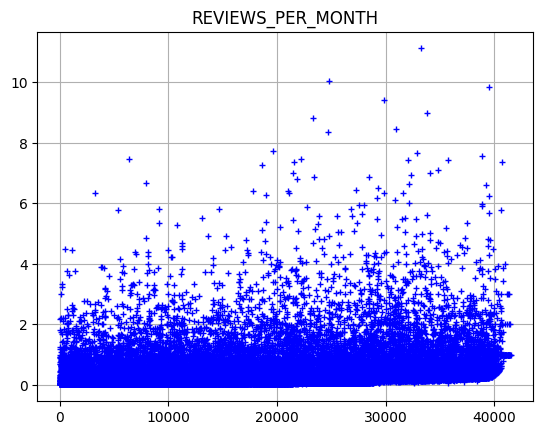

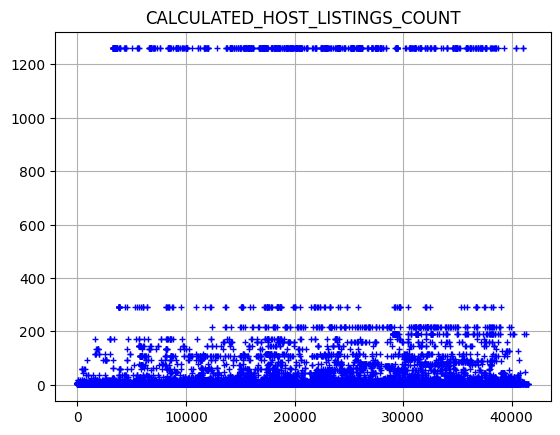

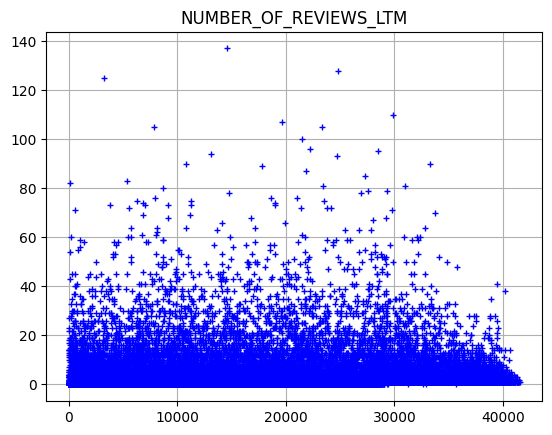

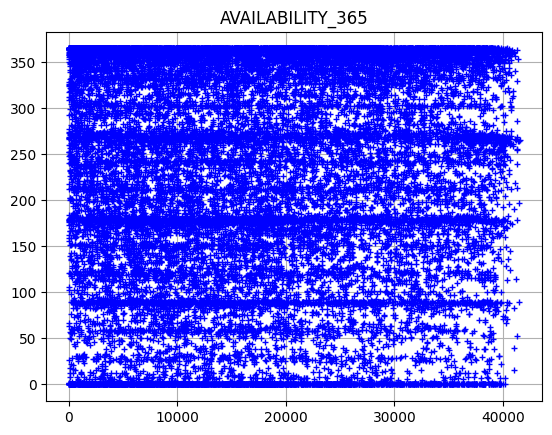

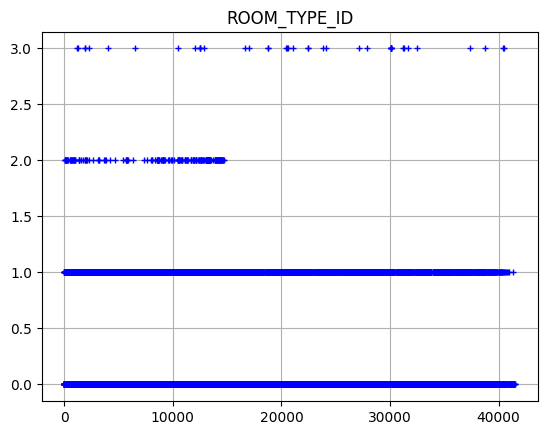

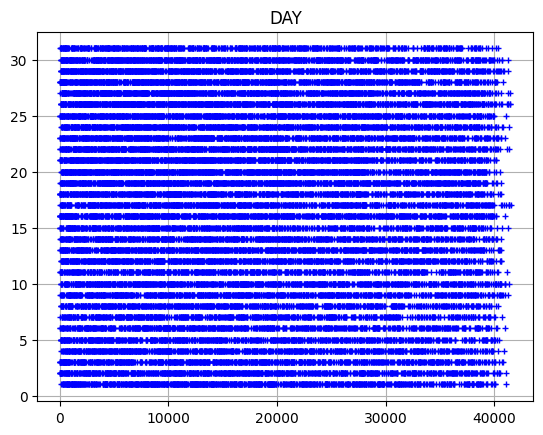

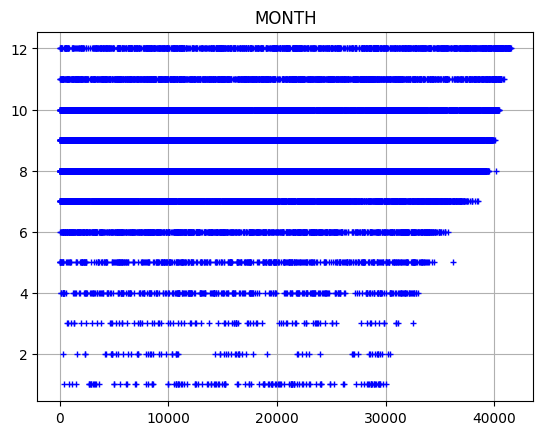

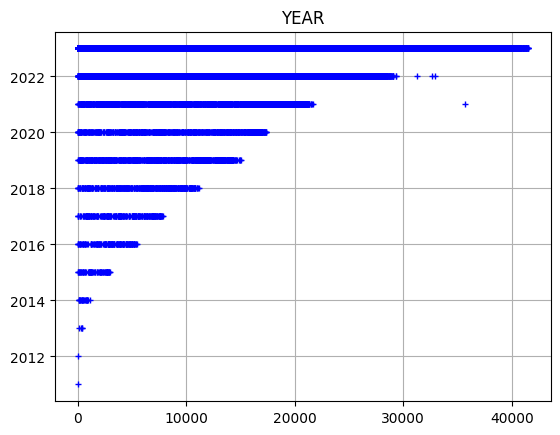

In [14]:
def histograms(df:pd.DataFrame, x_colums:list) -> None:
    '''
    Visualizar un histograma de las columnas
    
    :param df : pd.DataFrame
           description -> El dataframe
    :param x_columns : list
           description -> Columnas que se desean mostrar
    '''
    
    for c in x_colums:
        plt.plot(df[c], linewidth=0, marker='+', color='blue', markersize=4)
        plt.title(c.upper())
        plt.grid(True)
        plt.show()

x_columns = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'number_of_reviews_ltm', 'availability_365', 'room_type_id', 'day', 'month', 'year']
histograms(df=_dataframe, x_colums=x_columns)

**MATRIZ DE CORRELACION**

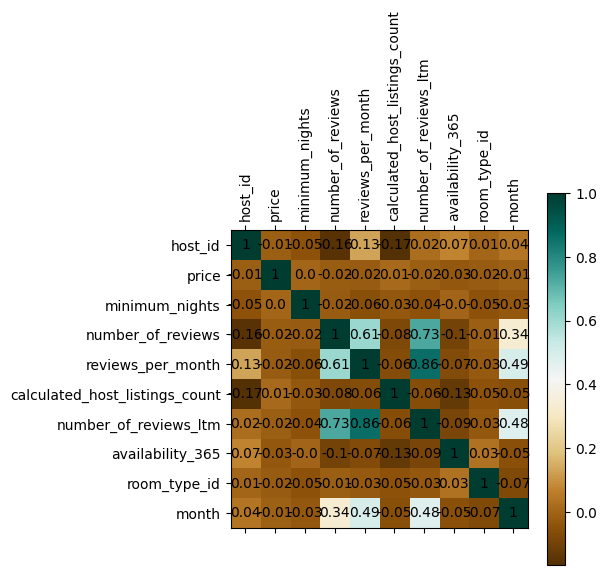

In [15]:
def muestra_matrix(df_correlation, df) -> None:
    '''
    Muestra la matriz de correlacion entre columnas en un mapa de colores.
    Mientras más se acerca a 1 el valor en los cuadrantes mayor es la correlacion entre las variables involucradas.
    '''
    
    #B=Blue & W=White & R=Red
    plt.matshow(df_correlation, cmap='BrBG')

    #-- Agrega nombre de columnas en eje X
    plt.xticks(range(len(list(df.columns))), df.columns, rotation=90)

    #-- Agrega nombre de columnas en eje Y
    plt.yticks(range(len(list(df.columns))), df.columns)

    for i in range(len(df_correlation.columns)):
        for j in range(len(df_correlation.columns)):
            #-- Redondear a  decimales
            value = round(df_correlation.iloc[i, j], 2)

            #-- Agrega valor de correlation en cada cajita del grafico
            if value != 1.0:
                plt.text(i, j, s=str(value), ha='center', va='center')
            else:
                plt.text(i, j, s='1', ha='center', va='center')
            
    plt.colorbar()
    plt.show()

num_df = _dataframe[['host_id', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'number_of_reviews_ltm', 'availability_365', 'room_type_id', 'month']]
df_correlation = num_df.corr()

muestra_matrix(df_correlation = df_correlation, df=num_df)

**VARIABLES CORRELATIVAS (DIAGRAMA DE DISPERSION)**

 <ol>
    <li><code>number_of_reviews</code> vs <code>reviews_per_month</code></li>
    <li><code>number_of_reviews</code> vs <code>number_of_reviews_ltm</code></li>
    <li><code>number_of_reviews_ltm</code> vs <code>reviews_per_month</code></li>
 </ol>

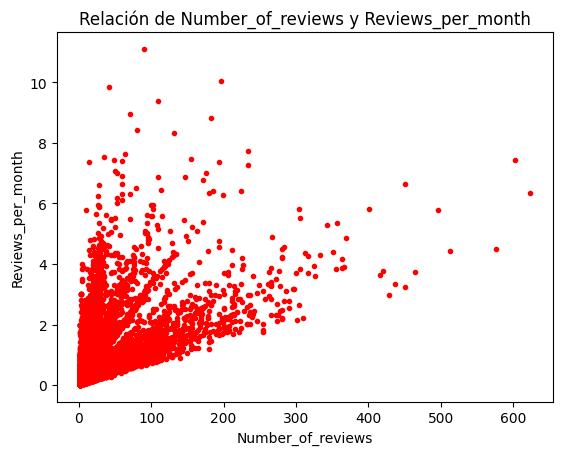

In [16]:
df1 = sort_by(col_names=['last_review'], df=_dataframe)
x = 'number_of_reviews'
y = 'reviews_per_month'
plt.scatter(df1[x], df1[y], color='red', marker='.')
plt.xlabel(x.capitalize())
plt.ylabel(y.capitalize())
plt.title(f'Relación de {x.capitalize()} y {y.capitalize()}')
plt.show()

# -- HAY MAS REVIEWS EN LOS PRIMEROS MESES

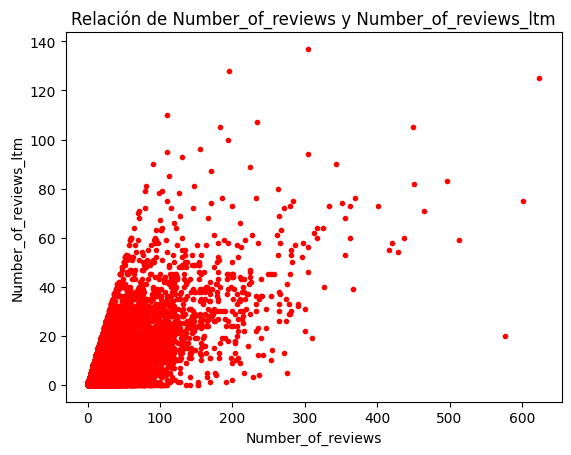

In [17]:
df2 = sort_by(col_names=['last_review'], df=_dataframe)
x = 'number_of_reviews'
y = 'number_of_reviews_ltm'
plt.scatter(df2[x], df2[y], color='red', marker='.')
plt.xlabel(x.capitalize())
plt.ylabel(y.capitalize())
plt.title(f'Relación de {x.capitalize()} y {y.capitalize()}')
plt.show()

# -- HAY MAS CONCENTRACION DE REVIEWS EN LOS PRIMEROS MESES DEL ANO

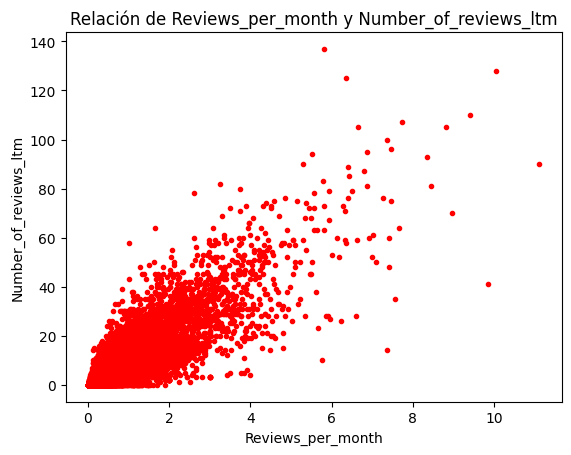

In [18]:
df3 = sort_by(col_names=['last_review'], df=_dataframe)
x = 'reviews_per_month'
y = 'number_of_reviews_ltm'
plt.scatter(df3[x], df3[y], color='red', marker='.')
plt.xlabel(x.capitalize())
plt.ylabel(y.capitalize())
plt.title(f'Relación de {x.capitalize()} y {y.capitalize()}')
plt.show()

# -- HAY MAS CONCENTRACION DE REVIEWS LOS ULTIMOS 3 MESES PREVIO AL MES ACTUAL EN LOS PRIMEROS MESES DEL ANO

**OTRAS RELACIONES**

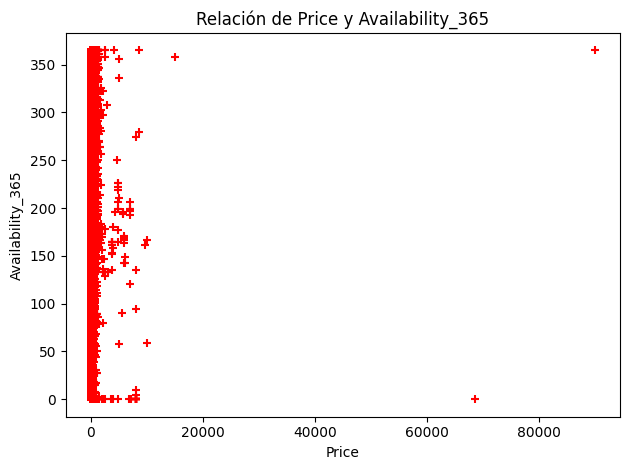

In [19]:
df4 = sort_by(col_names=['last_review'], df=_dataframe)
x = 'price'
y = 'availability_365'
plt.scatter(df4[x], df4[y], color='red', marker='+')
plt.xlabel(x.capitalize())
plt.ylabel(y.capitalize())
plt.title(f'Relación de {x.capitalize()} y {y.capitalize()}')
plt.tight_layout()
plt.show()

# -- EL TOTAL DE HABITACIONES DISMINUYE SU  DISPONIBILIDAD A MEDIDA QUE AUMENTA EL PRECIO

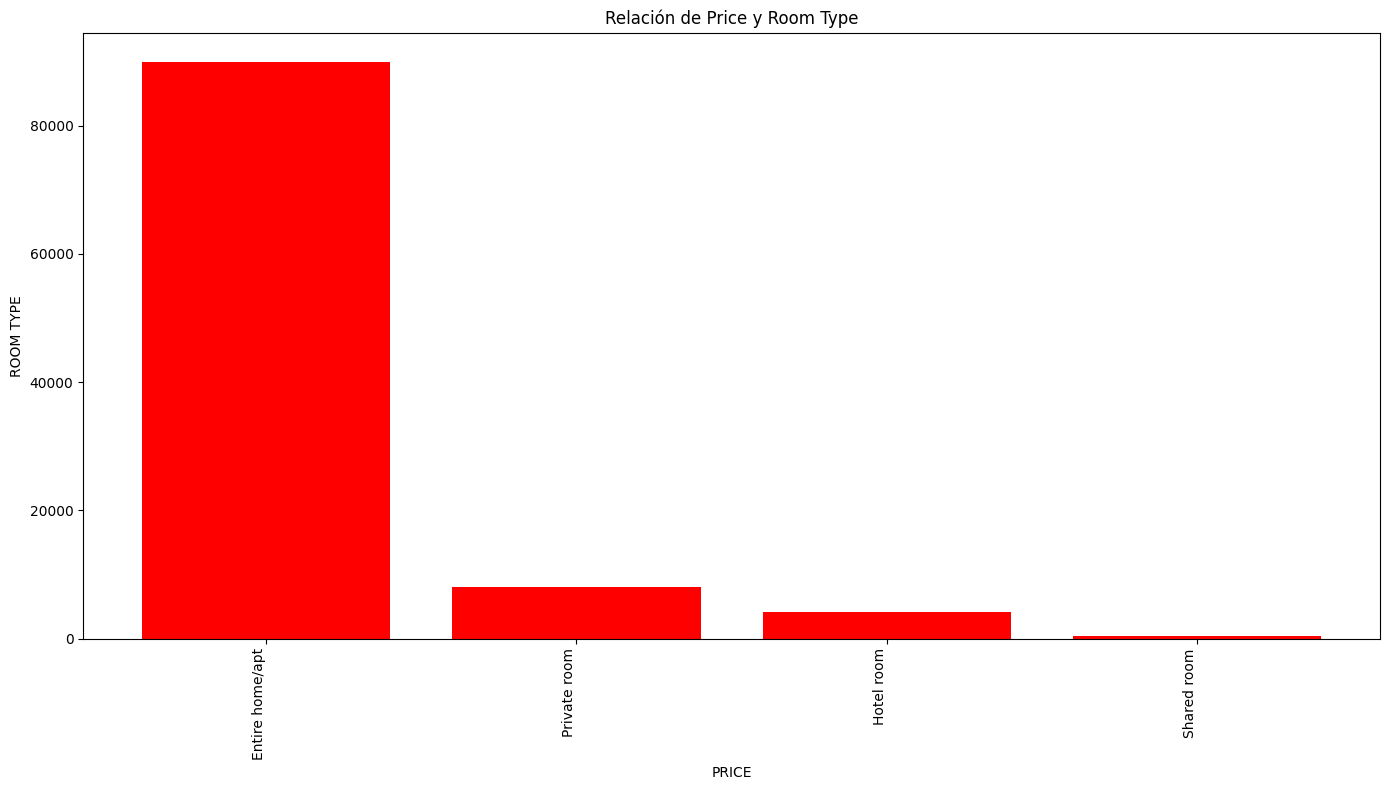

In [20]:
def graficar_room_vs_precio(df:pd.DataFrame):
    '''
    Grafico
    '''

    plt.figure(figsize=(14, 8))  # Ajustar el tamaño de la figura para que quepan más etiquetas
    bars = plt.bar(df['room_type'], df['price'], color='red')

    # Añadir título y etiquetas
    plt.title('Relación de Price y Room Type')
    plt.xlabel('PRICE')
    plt.ylabel('ROOM TYPE')

    # Etiquetas en eje X rotadas 45 grados para mejor lectura
    plt.xticks(rotation=90, ha='right')

    # Ajustar automáticamente el espaciado para evitar etiquetas cortadas
    plt.tight_layout()

    # Mostrar el gráfico
    plt.show()

graficar_room_vs_precio(_dataframe)
# -- EL PRECIO AUMENTA DE ACUERDO AL TIPO DE HABITACION

<Figure size 1400x800 with 0 Axes>

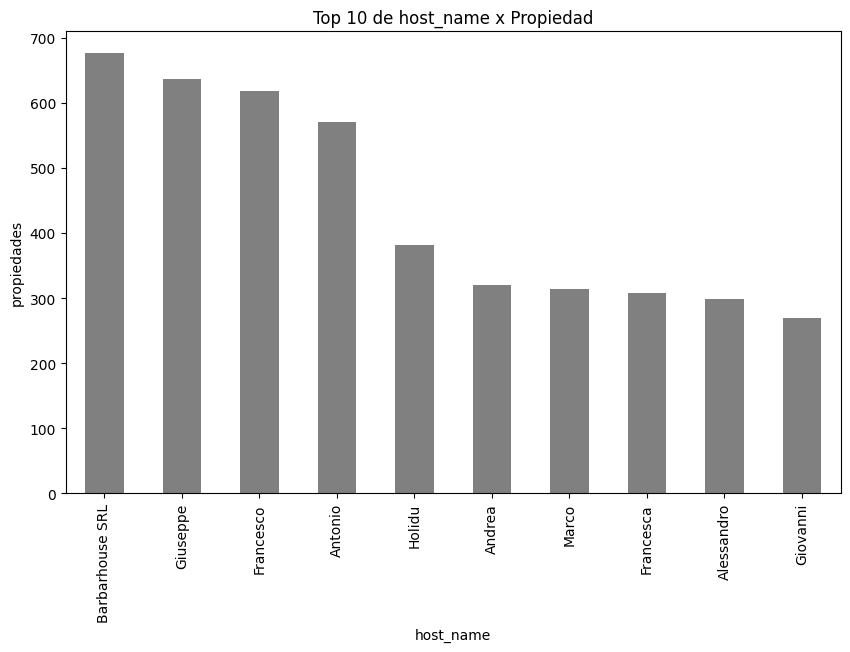

In [21]:
def graficar_top_10_host(df:pd.DataFrame, top:int):
    '''
    Grafico 
    '''

    plt.figure(figsize=(14, 8))
    name_counts = df['host_name'].value_counts().nlargest(top)

    plt.figure(figsize=(10, 6))
    name_counts.plot(kind='bar', color='gray')
    plt.title(f'Top {top} de host_name x Propiedad')
    plt.xlabel('host_name')
    plt.ylabel('propiedades')
    plt.show()

graficar_top_10_host(df=_dataframe, top=10)

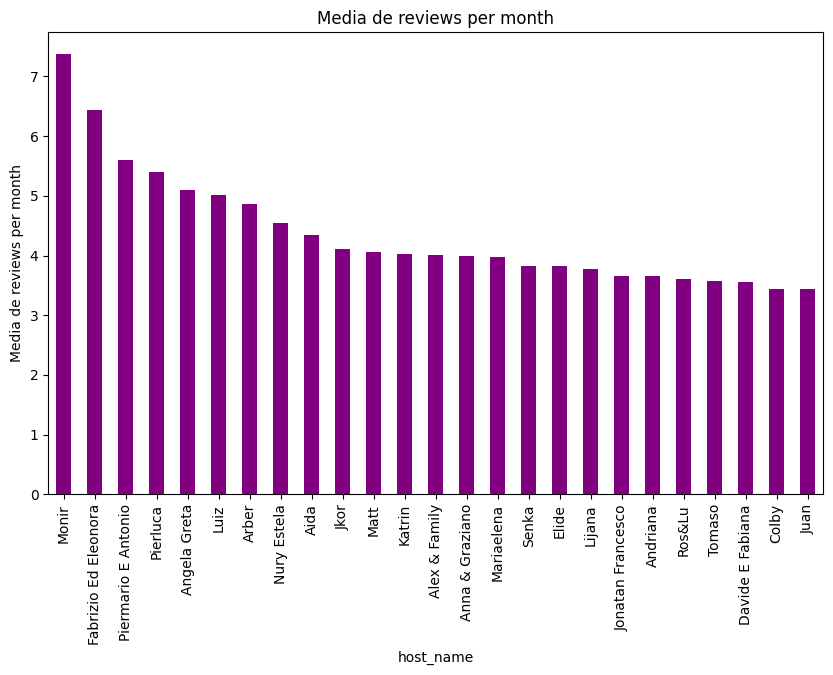

In [22]:
def graficar_media_reviews_per_host(df:pd.DataFrame, top:int):
    '''
    Calcular la media de 'reviews per month' para cada host_id 
    '''

    mean_reviews = df.groupby('host_name')['reviews_per_month'].mean().sort_values(ascending=True).nlargest(top)

    # Crear el gráfico de barras
    plt.figure(figsize=(10, 6))
    mean_reviews.plot(kind='bar', color='purple')
    plt.title('Media de reviews per month')
    plt.xlabel('host_name')
    plt.ylabel('Media de reviews per month')
    plt.xticks(rotation=90)
    plt.show()

graficar_media_reviews_per_host(df=_dataframe, top=25)

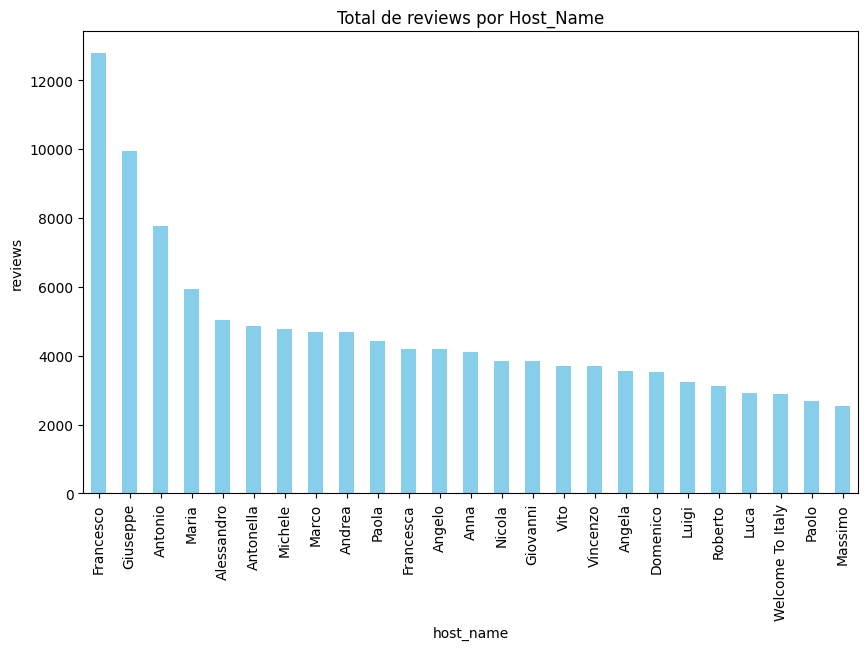

In [23]:
def graficar_total_reviews_per_host(df:pd.DataFrame, top:int):
    '''
    Calcular la media de 'reviews per month' para cada host_id 
    '''

    mean_reviews = df.groupby('host_name')['number_of_reviews'].sum().sort_values(ascending=True).nlargest(top)

    # Crear el gráfico de barras
    plt.figure(figsize=(10, 6))
    mean_reviews.plot(kind='bar', color='skyblue')
    plt.title('Total de reviews por Host_Name')
    plt.xlabel('host_name')
    plt.ylabel('reviews')
    plt.xticks(rotation=90)
    plt.show()

graficar_total_reviews_per_host(df=_dataframe, top=25)

<Figure size 1400x800 with 0 Axes>

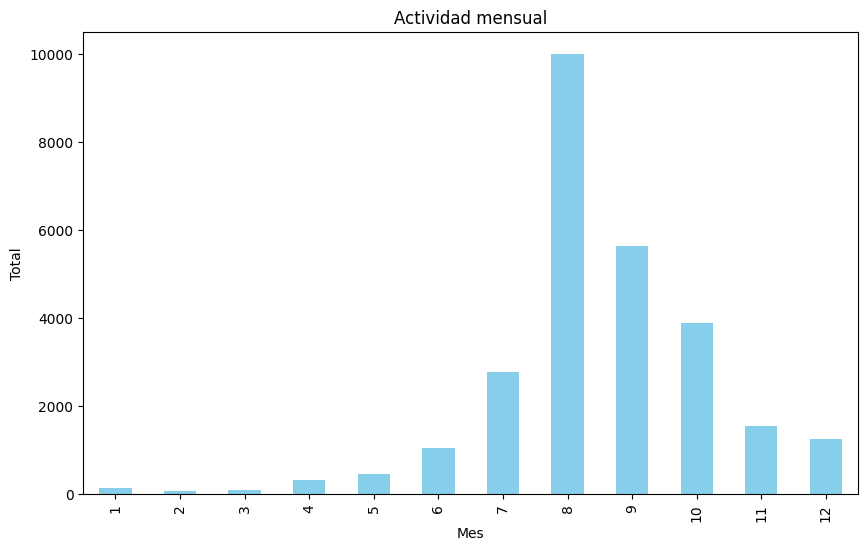

In [24]:
def mes_actividad(df:pd.DataFrame):
    '''
    Grafico 
    '''

    plt.figure(figsize=(14, 8))
    counts = df['month'].value_counts().sort_index()

    plt.figure(figsize=(10, 6))
    counts.plot(kind='bar', color='skyblue')
    plt.title(f'Actividad mensual')
    plt.xlabel('Mes')
    plt.ylabel('Total')
    plt.xticks(rotation=90)
    plt.show()

mes_actividad(df=_dataframe)

<Figure size 1400x800 with 0 Axes>

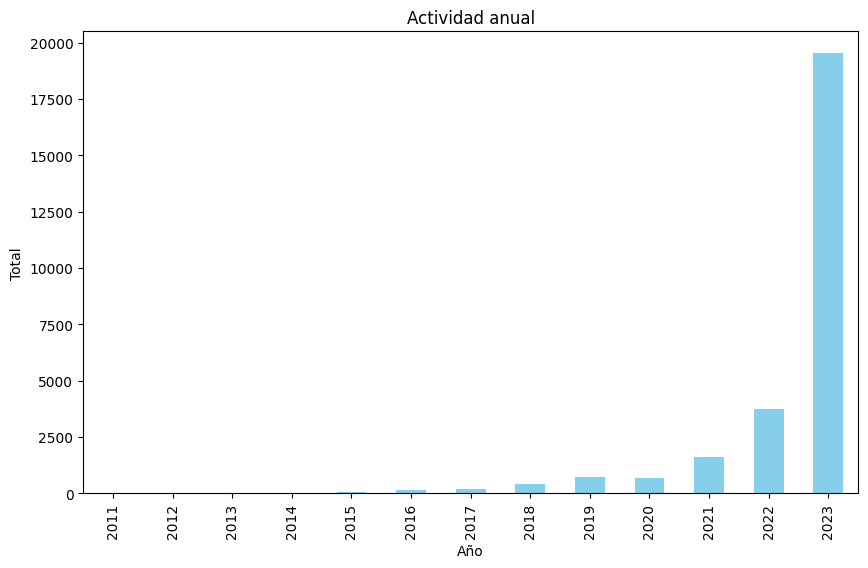

In [25]:
def ano_actividad(df:pd.DataFrame):
    '''
    Grafico 
    '''

    plt.figure(figsize=(14, 8))
    counts = df['year'].value_counts().sort_index()

    plt.figure(figsize=(10, 6))
    counts.plot(kind='bar', color='skyblue')
    plt.title(f'Actividad anual')
    plt.xlabel('Año')
    plt.ylabel('Total')
    plt.xticks(rotation=90)
    plt.show()

ano_actividad(df=_dataframe)

<Figure size 1400x800 with 0 Axes>

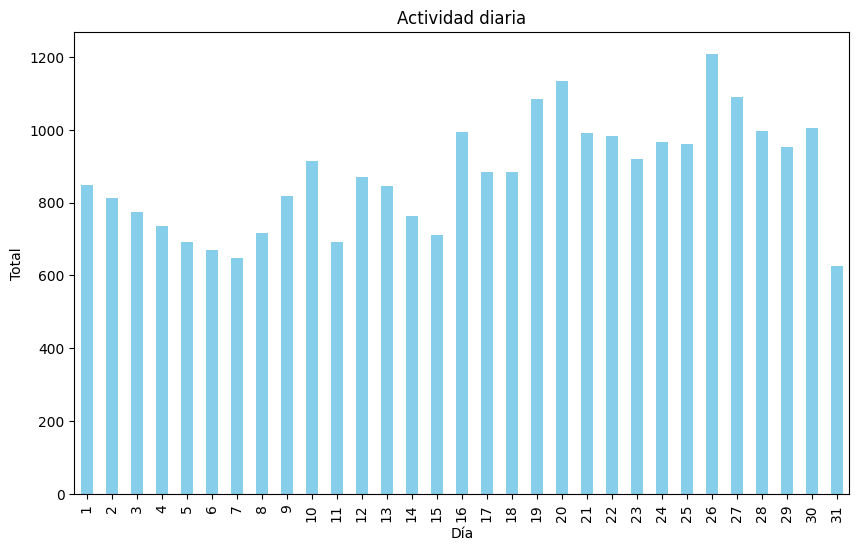

In [26]:
def dia_actividad(df:pd.DataFrame):
    '''
    Grafico 
    '''

    plt.figure(figsize=(14, 8))
    counts = df['day'].value_counts().sort_index()

    plt.figure(figsize=(10, 6))
    counts.plot(kind='bar', color='skyblue')
    plt.title(f'Actividad diaria')
    plt.xlabel('Día')
    plt.ylabel('Total')
    plt.xticks(rotation=90)
    plt.show()

dia_actividad(df=_dataframe)

<h1>Cuestionario</h1>

In [27]:
# -- ¿ Cúal es la media de precios en Trentino ?
# -- ¿ Cuál es el número de reseñas promedio por mes para los alojamientos que tienen un precio superior a X?
# -- ¿ Cúal es el total de propiedades?
# -- ¿ Cúal es el total de anfitriones con más de X propiedades ?
# -- ¿ Cúal es el anfitrión con mayor numero de propiedades, cuales son esas propiedades ?
# -- ¿ Cúal es el departamento más caro?
# -- ¿ Cúal es el departamento más barato?
# -- ¿ Cuales son los distintos tipos de habitaciones?

def precio_departamento_mas_caro(df:pd.DataFrame) -> int:
    '''
    Determina cúal es el precio de departamento mas caro
    '''

    df_caro = sort_by(col_names=['price'], df=df).iloc[-1]
    return df_caro

def precio_departamento_mas_barato(df:pd.DataFrame) -> int:
    '''
    Determina cúal es el precio de departamento mas barato
    '''
    df_barato = sort_by(col_names=['price'], df=df).iloc[0]
    return df_barato

def tipos_de_departamento(df:pd.DataFrame) -> list:
    '''
    Retorna una lista de los tipos de departamentos existentes

    :param df : pd.DataFrame
           description -> El dataframe
    '''

    return list(df['room_type'].unique())

def total_de_propiedades(df:pd.DataFrame, columna:str) -> int:
    '''
    Retorna el total de apartamentos existentes

    :param df : pd.DataFrame
           description -> El dataframe
    '''

    return df[columna].count()

def anfitrion_con_mas_propiedades(df:pd.DataFrame) -> tuple:
    '''
    Determina cual es el anfitrion con mayor numero de propiedades

    :param df : pd.DataFrame
           description -> El dataframe
    '''

    host_id = df['host_id'].value_counts().idxmax()
    nombre = df[['name', 'host_name']][df['host_id']==host_id]
    return nombre, host_id

def total_anfitriones_con_mas_de_x_propiedades(df:pd.DataFrame, total:int) -> int:
    '''
    Determina la cantidad de anfitriones con mas de X propiedades

    :param df : pd.DataFrame
           description -> El dataframe
    :param total : int
           description -> Limite
    '''

    prop_por_anfitrion = df.groupby('host_id')['id'].nunique()
    anfitriones_con_mas_prop = prop_por_anfitrion[prop_por_anfitrion > total]

    return len(anfitriones_con_mas_prop)

def resenas_por_mes_precio_superior(df:pd.DataFrame, precio_limite:float) -> float:
    '''
    Determina cuál es el número de reseñas promedio por mes para los alojamientos que tienen un precio superior a un limite dado
    
    :param df : pd.DataFrame
           description -> El dataframe
    :param precio_limite : float
           description -> Limite
    '''

    df_filtrado = df[df['price'] > precio_limite]
    prom_resenas_por_mes = df_filtrado['reviews_per_month'].mean()
    return round(prom_resenas_por_mes,2)

def media_precios_por_zona(df:pd.DataFrame) -> float:
    '''
    Determina cual es el promedio de precios en la localidad
    
    :param df : pd.DataFrame
           description -> El dataframe
    '''

    df['price'] = pd.to_numeric(df['price'], errors='coerce')
    media_precios = df['price'].mean()
    return round(media_precios, 2)

print('¿Cúal es la media de precios en Lucia')
print(f"\tLa media de precios es de: ${media_precios_por_zona(_dataframe)}\n")

print('¿Cuál es el número de reseñas promedio por mes para los alojamientos que tienen un precio superior a $X?')
print(f"\tLa media de precios es de: ${resenas_por_mes_precio_superior(_dataframe, 300)}\n")

print('¿Cúal es el total de propiedades?')
print(f"\t El total de propiedades es {total_de_propiedades(df=_dataframe, columna='id')}\n")

PROPIEDADES = 5
print(f'¿Cúal es el total de anfitriones con más de {PROPIEDADES} propiedades ?')
print(f"\t {total_anfitriones_con_mas_de_x_propiedades(df=_dataframe, total=PROPIEDADES)} anfitriones\n")

print(f'¿ Cúal es el anfitrión con mayor número de propiedades, cuales son esas propiedades ?')
print(f"\t\n {anfitrion_con_mas_propiedades(_dataframe)[0]} \n")

print(f'¿ Cúal es el departamento más caro?')
print(f"\t \n{precio_departamento_mas_caro(_dataframe[['price', 'room_type', 'host_name']])}\n")

print(f'¿ Cúal es el departamento más barato?')
print(f"\t \n{precio_departamento_mas_barato(_dataframe[['price', 'room_type', 'host_name']])}\n")

print(f'¿ Cuales son los distintos tipos de habitaciones?')
print(f"\t {tipos_de_departamento(_dataframe)}\n")

¿Cúal es la media de precios en Lucia
	La media de precios es de: $151.87

¿Cuál es el número de reseñas promedio por mes para los alojamientos que tienen un precio superior a $X?
	La media de precios es de: $0.33

¿Cúal es el total de propiedades?
	 El total de propiedades es 27191

¿Cúal es el total de anfitriones con más de 5 propiedades ?
	 341 anfitriones

¿ Cúal es el anfitrión con mayor número de propiedades, cuales son esas propiedades ?
	
                                   name        host_name
3655               Villa in Carovigno   Barbarhouse SRL
3333                Home in Pescoluse   Barbarhouse SRL
6626                   Home in Ostuni   Barbarhouse SRL
8501              Home in Padula Fede   Barbarhouse SRL
9236           Rental unit in Boncore   Barbarhouse SRL
...                                ...              ...
40436  Villa in San Vito dei Normanni   Barbarhouse SRL
15937                  Home in Ostuni   Barbarhouse SRL
24091   Townhouse in Ceglie Messapica   Bar